In [1]:
# Loading the dataset
# Importing pandas library
import pandas as pd
# reading the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Flood2.csv')

In [2]:
# To make the codes reprducible
seed = 7

In [3]:
# Exploring the dataset

In [4]:
mydata.head()

,Time,Area,ET,P,AT,SM
0,1/1/2005,3563530.00,0.000003,3.757262,12.265436,1.301278
1,1/2/2005,3474497.25,0.000002,4.382504,13.751855,1.320082
2,1/3/2005,3467959.75,0.000004,17.027948,10.879114,1.377332
3,1/4/2005,3605078.50,0.000005,40.451202,6.159296,1.406343
4,1/5/2005,3945098.25,0.000005,23.137531,2.658197,1.457837


In [5]:
# Descriptive statistics
mydata.describe()

,Area,ET,P,AT,SM
count,3.994000e+03,3994.000000,3994.000000,3994.000000,3994.000000
mean,2.828388e+06,0.000024,3.134611,14.031194,1.222583
std,1.235075e+06,0.000017,5.791662,10.815100,0.146059
min,1.170620e+06,-0.000001,0.000000,-15.540076,0.698136
25%,1.863795e+06,0.000007,0.055491,5.142480,1.134451
50%,2.569146e+06,0.000021,0.479799,14.949548,1.248526
75%,3.612540e+06,0.000040,3.720712,23.502130,1.332297
max,6.852320e+06,0.000062,72.185623,35.047968,1.548314


In [6]:
# Dimension
mydata.shape

(3994, 6)

In [7]:
# Ouput and input data preparation

In [8]:
# The output variable or target, y
y = mydata['Area']

In [9]:
y.shape

(3994,)

In [10]:
y.head()

0    3563530.00
1    3474497.25
2    3467959.75
3    3605078.50
4    3945098.25
Name: Area, dtype: float64

In [11]:
# The input variables or features, X
X = mydata.drop(['Time', 'Area'], axis = 1)

In [12]:
X.head()

,ET,P,AT,SM
0,0.000003,3.757262,12.265436,1.301278
1,0.000002,4.382504,13.751855,1.320082
2,0.000004,17.027948,10.879114,1.377332
3,0.000005,40.451202,6.159296,1.406343
4,0.000005,23.137531,2.658197,1.457837


In [13]:
X.shape

(3994, 4)

In [14]:
# Splitting the dataset into training and testing datasets
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30, shuffle = True)

In [15]:
# The dimensions
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2795, 4) (1199, 4) (2795,) (1199,)


In [16]:
### Linear Regression Modeling ##############
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
from numpy import absolute
# To ignore error messages
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Instantiating the model
model = LinearRegression(fit_intercept = True, copy_X = True, positive = False, n_jobs = None)

In [18]:
# Fitting the model on the training dataset
lm = model.fit(X_train, y_train)

In [19]:
# The model intercept and coefficients

In [20]:
lm.intercept_ # Intercept

-5181590.90360455

In [21]:
lm.coef_ # Coefficients

array([ 4.20632574e+10, -1.54275751e+03,  6.68453097e+03,  5.66121730e+06])

In [22]:
# Training model evaluation
y_predtr = lm.predict(X_train)
print('The training r-sq is:', r2_score(y_train, y_predtr))
print('The training MAE is:', mean_absolute_error(y_train, y_predtr))
print('The training MSE is:', mean_squared_error(y_train, y_predtr))

The training r-sq is: 0.7025189889181487
The training MAE is: 504833.29984716023
The training MSE is: 450568751987.92377


In [23]:
# The testing model evaluation
y_predts = lm.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, y_predts))
print('The testing MAE is:', mean_absolute_error(y_test, y_predts))
print('The testing MSE is:', mean_squared_error(y_test, y_predts))

The testing r-sq is: 0.6937120910524509
The testing MAE is: 512118.31649803655
The testing MSE is: 474095443659.1954


In [24]:
# k-fold cross-validation

In [25]:
# On the training dataset
train_cv = cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [26]:
train_cv

array([-4.78252726e+11, -4.74502910e+11, -3.95060846e+11, -4.28521262e+11,
       -4.62307251e+11, -4.41289868e+11, -4.53341275e+11, -4.38329486e+11,
       -4.81899203e+11, -4.66224155e+11])

In [27]:
# The absolute mean cv
print('The absolute mean cv error is:', absolute(np.mean(train_cv)))

The absolute mean cv error is: 451972898004.41125


In [28]:
# On the testing dataset
test_cv = cross_val_score(lm, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)

In [29]:
test_cv

array([-4.37525950e+11, -4.22383935e+11, -4.66246037e+11, -4.09131862e+11,
       -3.93090414e+11, -5.99045262e+11, -5.55106544e+11, -4.58005252e+11,
       -4.06870759e+11, -5.93951881e+11])

In [30]:
# The absolute mean error
print('The absolute mean testing cv error is:', absolute(np.mean(test_cv)))

The absolute mean testing cv error is: 474135789647.9857


In [31]:
######## SHAP; SHapley Additive exPlanations
# You need to install shap in trough Anaconda prompt/Cmd prompt/Jupyter Terminal
# by typing
# conda install -c conda-forge shap
# pip install shap

In [32]:
# Jupyter notebook
import shap
shap.initjs()

In [33]:
# Creating an explainer on the training dataset to calculate shap values
explainer = shap.LinearExplainer(lm, X_train)

In [61]:
# The shap values on the traing dataset
shap_valuestr = explainer.shap_values(X_train)

In [62]:
shap_valuestr

array([[  -91904.01114433,   -41115.36102855,    25169.59033345,
          845821.74823708],
       [ 1556975.67985187,     4011.8179626 ,   100758.56066524,
          -92629.76841783],
       [ -902042.34911848,     4141.77508498,   -98724.14037575,
        -1112037.73409878],
       ...,
       [ -588250.44874012,    -4979.65011601,   -35537.48837755,
          317865.29034493],
       [ -776693.84199683,     4085.05939108,   -91980.44462181,
          -78750.73941237],
       [ -922232.71268169,     4211.64772965,  -171884.94814804,
          851921.7325206 ]])

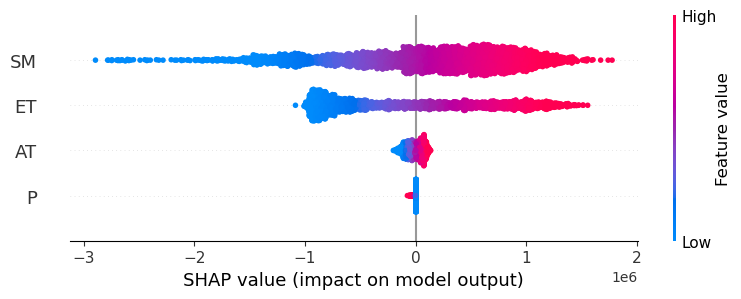

In [63]:
# Shap summary plot (combination of feature importance and feature effect)
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns)

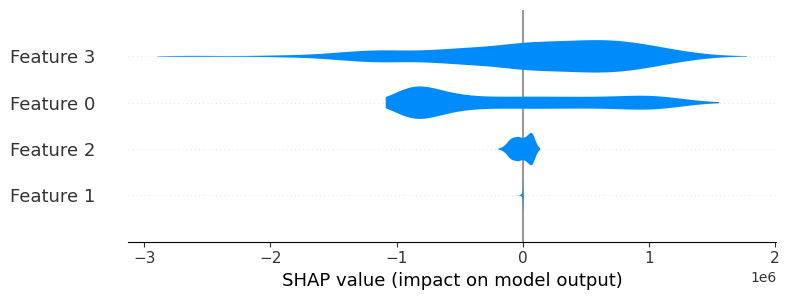

In [66]:
shap.summary_plot(shap_valuestr, plot_type='violin')

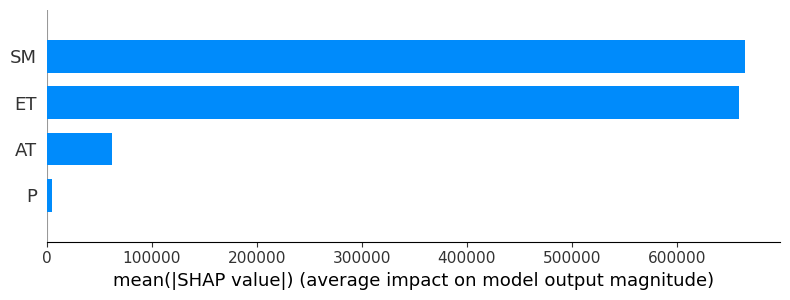

In [67]:
# Shap feature importance plot (Features with large absolute shap values are 
# the most important)
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'bar')

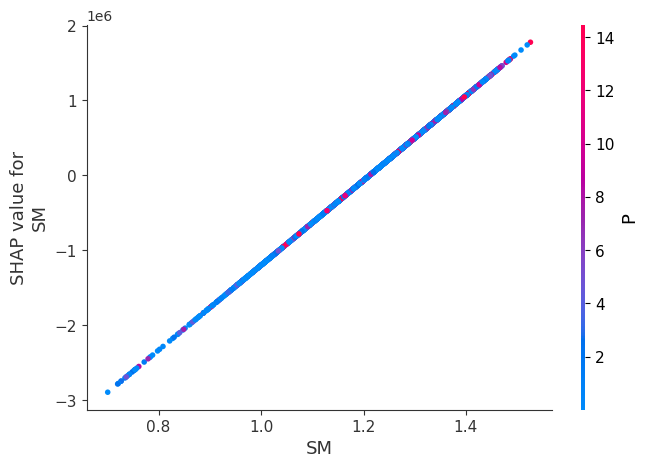

In [68]:
# Dependence plot
shap.dependence_plot(3, shap_valuestr, X_train, feature_names = X_train.columns)

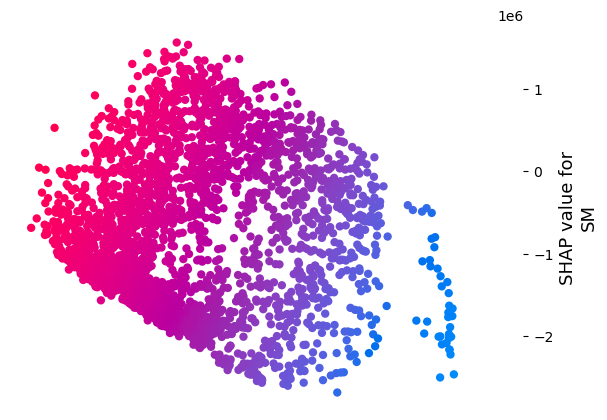

In [43]:
# Embedding plot (project shap values to 2d projection
# using Principal Component Analyis for visualization)
shap.embedding_plot('SM', explainer.shap_values(X_train), feature_names= X_train.columns)


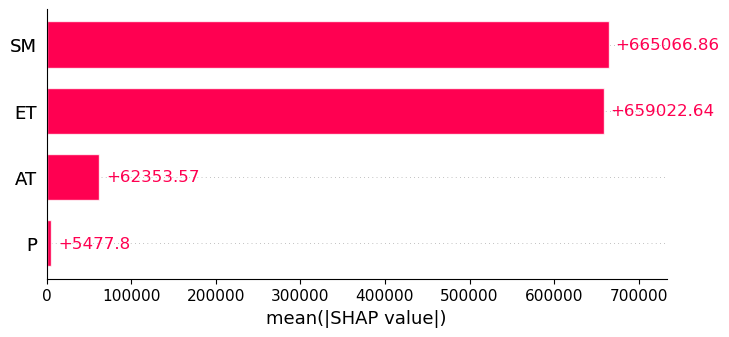

In [44]:
# Global bar plot
shap_valuestr = explainer(X_train)
shap.plots.bar(shap_valuestr)

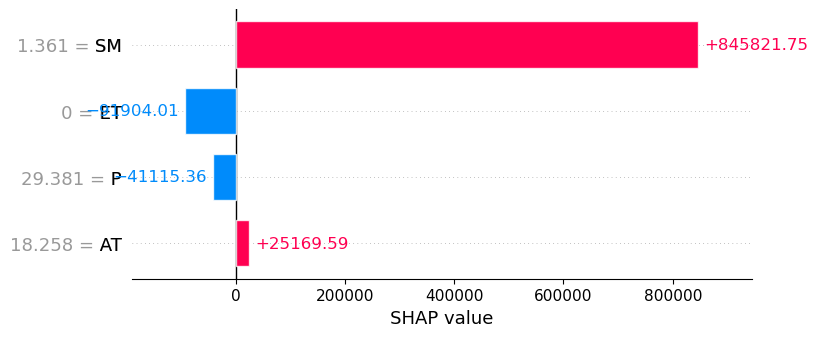

In [45]:
# The local bar plot
shap.plots.bar(shap_valuestr[0])

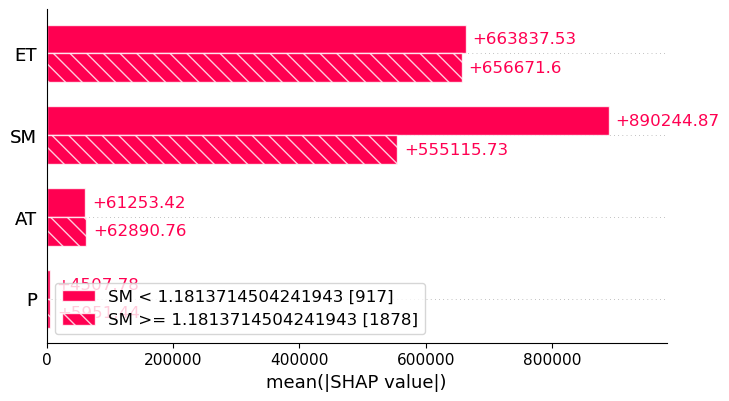

In [53]:
# Auto-cohort feature plot
shap.plots.bar(shap_valuestr.cohorts(2).abs.mean(0))

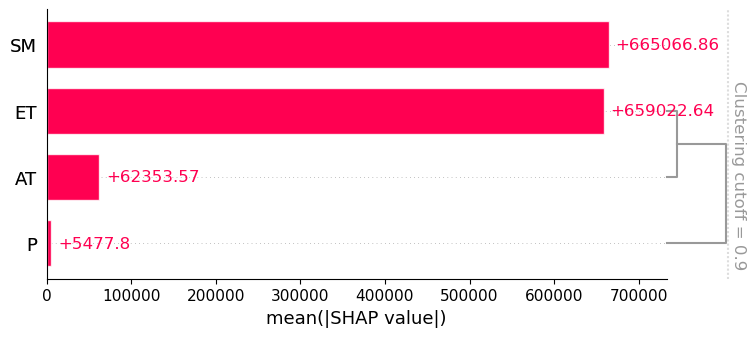

In [54]:
# Feature clustering plot
clustering = shap.utils.hclust(X_train, y_train)
shap.plots.bar(explainer(X_train), clustering = clustering, clustering_cutoff = 0.9)

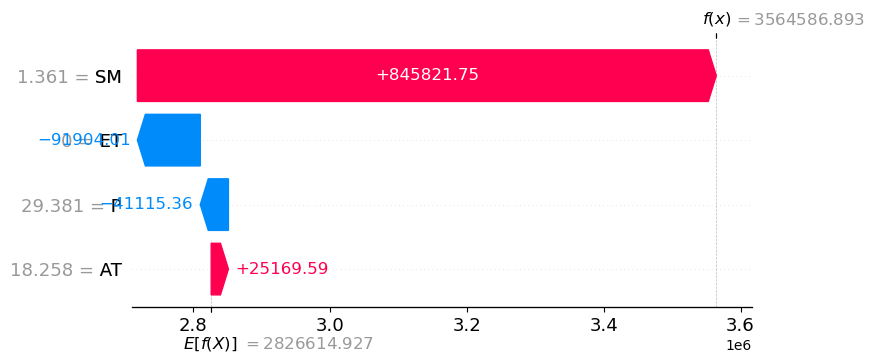

In [55]:
# Waterfall plot
shap.plots.waterfall(shap_valuestr[0])

In [56]:
# Force plot
shap.plots.force(shap_valuestr[0])

In [44]:
# Shap values on the whole testing dataset
shap_valuests = explainer.shap_values(X_test)

In [55]:
shap_valuests

array([[ -37221.77649394,  -10038.06110245,   65330.01844458,
        -632511.68811144],
       [-289601.32103418,    4157.66743583,   -2033.44267684,
         -73699.16728271],
       [1254120.22640359,    3323.21907716,   99280.41033177,
         341680.07839784],
       ...,
       [  42698.41261047,  -12756.11602837,   19065.2231751 ,
         553897.57963101],
       [-192855.82896042,    4172.94829777,  -40882.9941575 ,
        1182879.00368367],
       [ 492775.26704055,  -15071.55144858,   71940.69871674,
         -29817.78690923]])

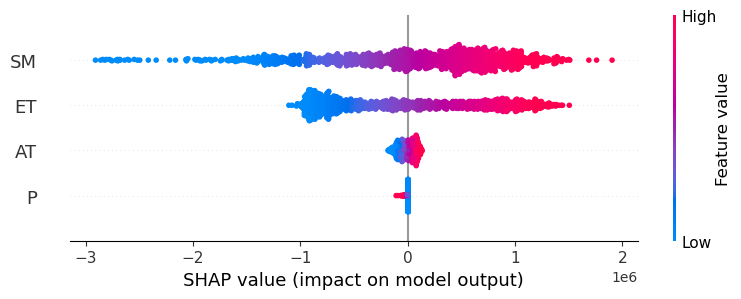

In [57]:
# Shap summary plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns)

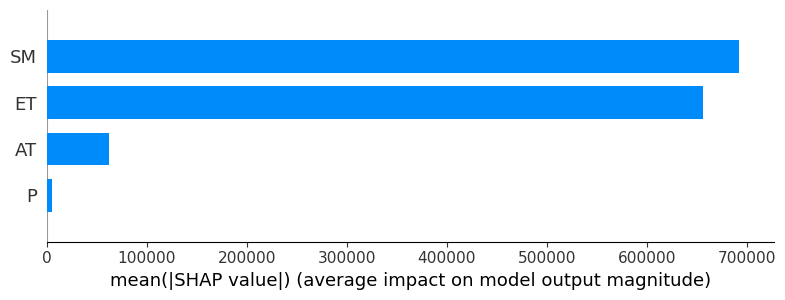

In [58]:
# Shap feature importance plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'bar' )

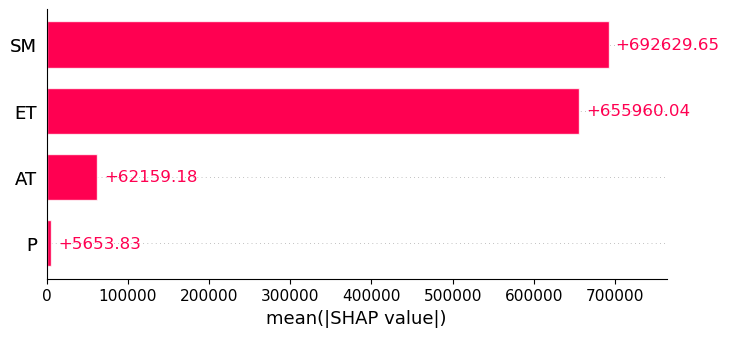

In [60]:
# Global bar plot
shap_valuests = explainer(X_test)
shap.plots.bar(shap_valuests)

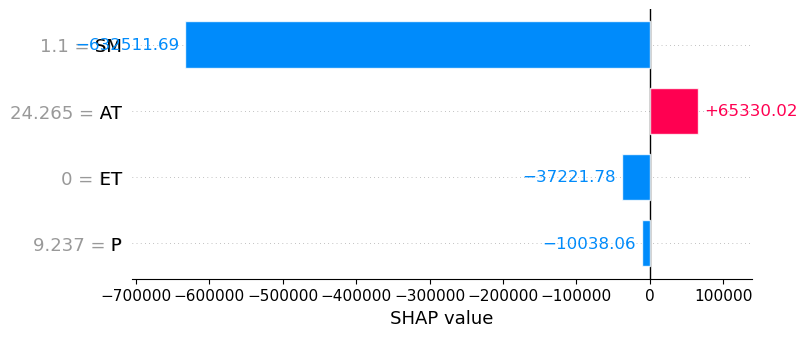

In [61]:
# The local bar plot
shap.plots.bar(shap_valuests[0])

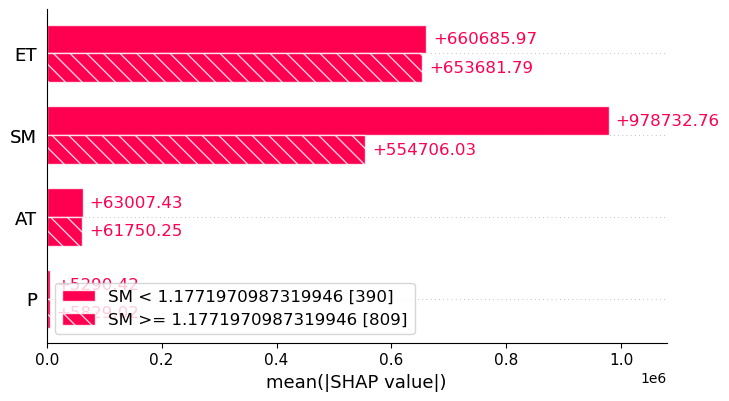

In [63]:
# Auto-cohort feature plot
shap.plots.bar(shap_valuests.cohorts(2).abs.mean(0))

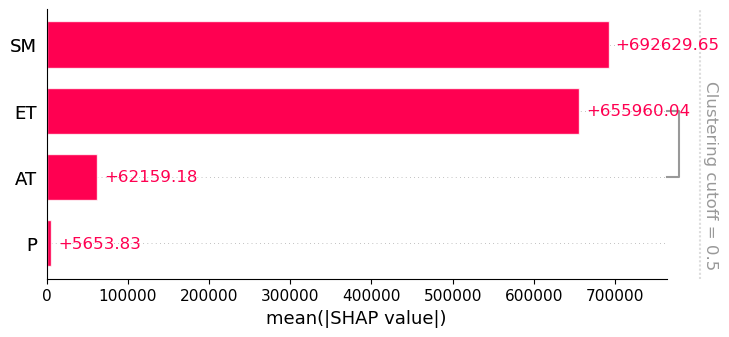

In [65]:
# Feature clustering
clustering = shap.utils.hclust(X_test, y_test)
shap.plots.bar(shap_valuests, clustering = clustering)

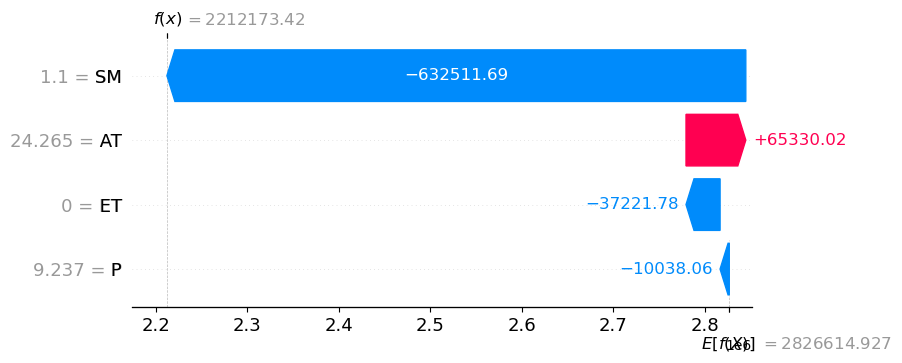

In [66]:
# Waterfall plot
shap.plots.waterfall(shap_valuests[0])

In [67]:
# Force plot
shap.plots.force(shap_valuests[0])